#*LAB 02*

Implement a denoising autoencoder that removes noise from images.

Train using dataset with artificially added noise.

Compare noisy and reconstructed images.

Implement a Variational Autoencoder (VAE) using TensorFlow/Keras.

Train on the dataset and generate new images.

Visualize the latent space

Num GPUs Available:  1
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0174 - val_loss: 0.0088
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0085 - val_loss: 0.0078
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0065 - val_loss: 0.0066
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


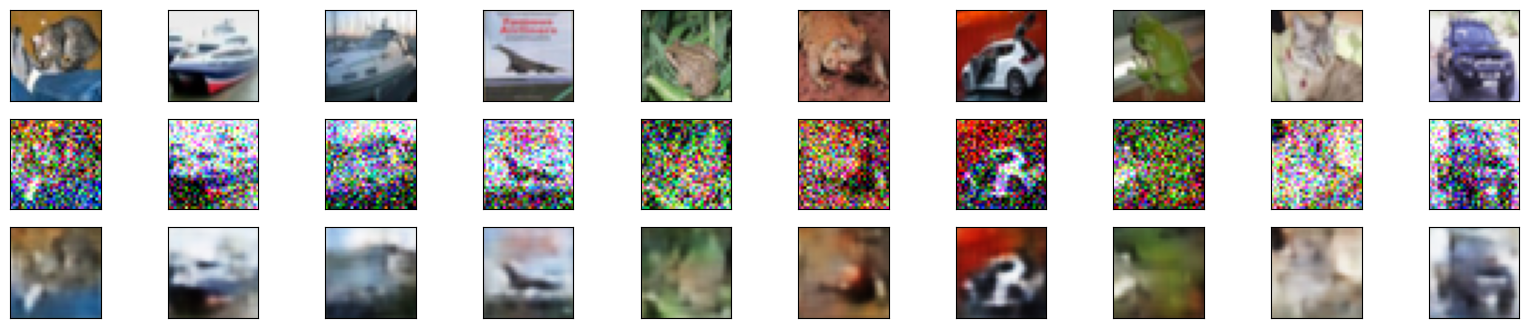

Manual Reconstruction Loss (MSE): 0.006576379478905723


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

def add_noise(imgs, noise_factor=0.3):
    noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    return noisy_imgs

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

def build_denoising_autoencoder(input_shape=(32, 32, 3)):
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return model


autoencoder = build_denoising_autoencoder()

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=64, validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Manual Reconstruction Loss (MSE): {mse}")